In [21]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cd ..

/Users/zswitten/coronavirus


In [5]:
cell_id_to_index = json.load(open('cell_id_to_index.json', 'r'))
train_perturbagens = np.load('train_perturbagens.npy', allow_pickle=True)

In [29]:
NORMALIZE_COLUMNS = True
preds = pd.read_csv('signature_predictions.csv')
pred_col_names = preds.columns[-10:]

# Filter out training data
preds = preds[preds.cell_id.isin(cell_id_to_index)]

# Get average prediction for each column
mean_preds = preds.groupby('pert_id')[pred_col_names].mean()
if NORMALIZE_COLUMNS:
    for col_name in pred_col_names:
        mean_here = mean_preds[col_name].mean()
        mean_preds[col_name] = mean_preds[col_name] / mean_here
averaged_preds = mean_preds.reset_index().merge(
    preds[['pert_id', 'pert_iname']], on='pert_id', how='inner'
).drop_duplicates(subset=['pert_id'])

# Average the columns together
pred_cols = averaged_preds.loc[:, pred_col_names]
averaged_preds['average_prediction'] = pred_cols.mean(axis=1)

/Users/zswitten/coronavirus/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
for col_name in pred_col_names:
    mean_here = mean_preds[col_name].mean()
    mean_preds[col_name] = mean_preds[col_name] / mean_here

In [18]:
mean_preds[pred_col_names[-3]].mean()

1.0

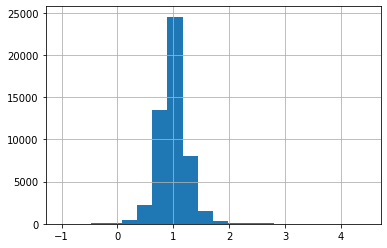

In [24]:
averaged_preds['average_prediction']

In [28]:
averaged_preds[~averaged_preds['pert_id'].isin(train_perturbagens)].sort_values(
    'average_prediction', ascending=False
).iloc[0:50][['pert_iname', 'average_prediction']]

,pert_iname,average_prediction
414090,DLG3,3.121198
422291,MAP4K2,2.990107
420974,LATS2,2.948544
134495,BRD-K61718261,2.852439
423331,MAPKAPK3,2.849065
420983,MAP3K9,2.833039
295307,EPHB6,2.794879
242475,NFE2L2,2.685396
296485,MAP3K6,2.678011
421964,TAF1L,2.675917
